In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Подготовка данных

In [ ]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


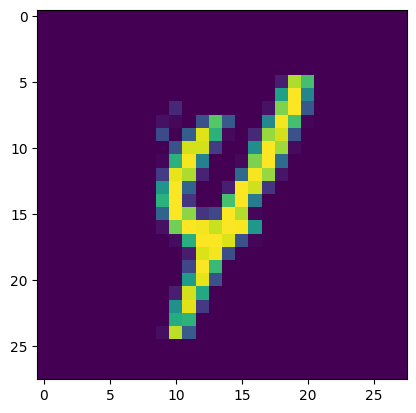

In [ ]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [ ]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


### Мотивация: настройка параметров влияет на качество

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


Вывод: В зависимости от количества соседей в методе kNN качество может существенно отличаться!

### Задания

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2022sharebot c пометкой seminar03

### Решение задачи 1

In [10]:
# Определяем параметры для перебора
param_grid = {
    'n_neighbors': range(1, 20, 2),  # нечетное число соседей
    'weights': ['uniform', 'distance'],  # равномерные или взвешенные веса
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # разные метрики расстояний
}

# Создаем KNN классификатор
knn = KNeighborsClassifier()

# Перебор параметров с кросс-валидацией
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_x_1[:2000], train_y[:2000])

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Сохраняем лучшие параметры в файл
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(best_params, f)

NameError: name 'KNeighborsClassifier' is not defined

### Решение задачи 2

In [ ]:
# ваше решение задачи 2

In [34]:
etalons_10 = np.zeros((10, 784))
np.save('knn_10_best', etalons_10)

### Решение задачи 3

In [ ]:
# ваше решение задачи 3